In [16]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("poster")

In [2]:
data = []

for file in os.listdir('data'):
    user_data = json.load(open('data/' + file, 'r'))
    data.append(user_data)

In [3]:
data[4][24]

{'rt': 3856.7549999988696,
 'stimulus': ['videos/scene_050.mp4'],
 'response': 1,
 'scene_dir': 'scene_050',
 'answer': 1,
 'gt_params': [2.95, 0.91],
 'distractor_params': [1.21, 0.77],
 'distance': 3.047200000000001,
 'trial_type': 'video-button-response',
 'trial_index': 24,
 'time_elapsed': 228576,
 'internal_node_id': '0.0-24.0',
 'correct': True}

In [4]:
phases = 0
for i, row in enumerate(data[0]):
    if row.get('trial_type') == 'video-button-response':
        phases += 1
print(phases)
    

60


In [5]:
def get_phase(row, phase_opts=['White', 'Static Dots', 'Moving Dots']):
    scene_dir = row.get('scene_dir')
    if not scene_dir:
        return
    scene = int(scene_dir.split('_')[1])
    return phase_opts[int(scene / 50)]

def get_stats(data, examples_per_phase=20):
    rt = []
    correct = []
    difficulty = []
    phase = []
    for i, row in enumerate(data[3:]):
        if row.get('trial_type') == 'video-button-response':

            rt.append(row.get('rt'))
            correct.append(row.get('correct'))
            gt = row.get('gt_params')
            dsc = row.get('distractor_params')
            distance = np.sqrt((gt[0] - dsc[0])**2 + (gt[1]-dsc[1])**2)
            difficulty.append(distance)
            phase.append(get_phase(row))
            
    return rt, correct, difficulty, phase

David


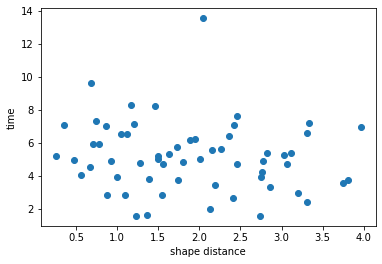

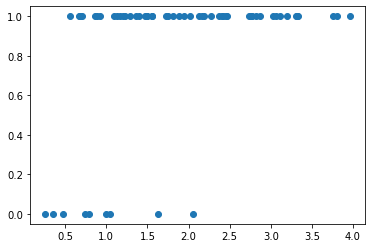

amir


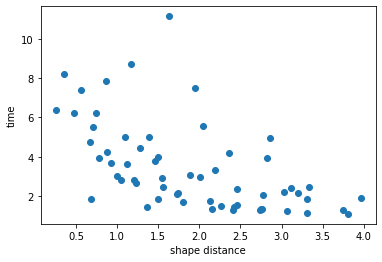

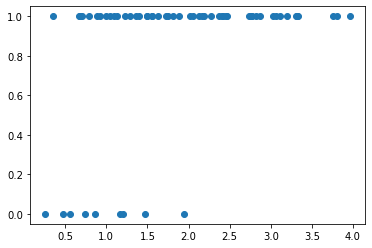

Peter Tilton


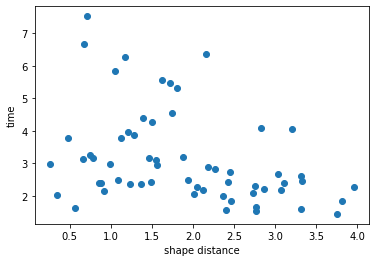

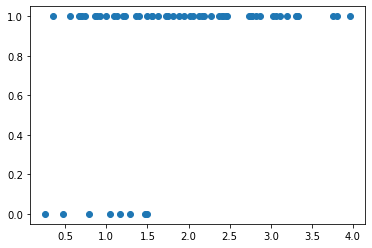

cynthia


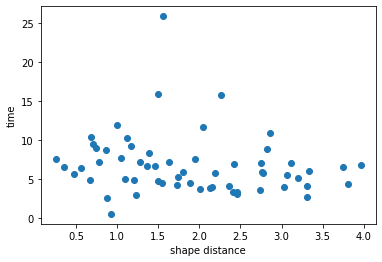

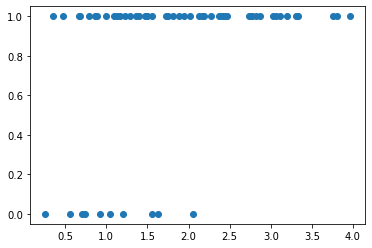

TS


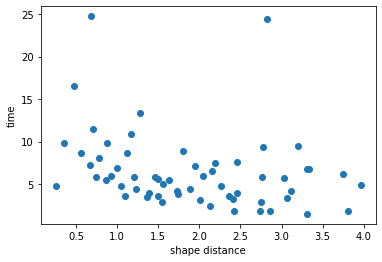

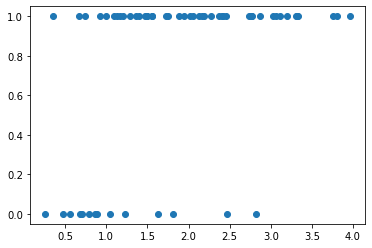

marta


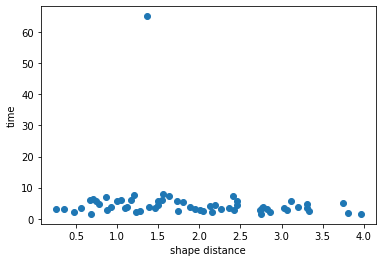

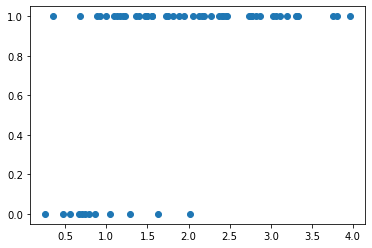

Halely


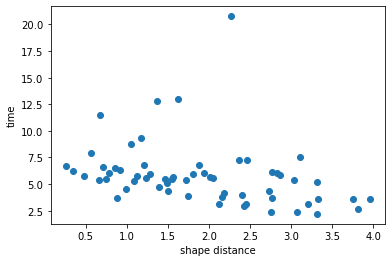

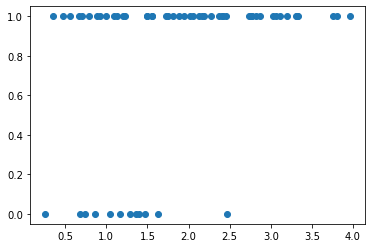

Meged Eisenberg


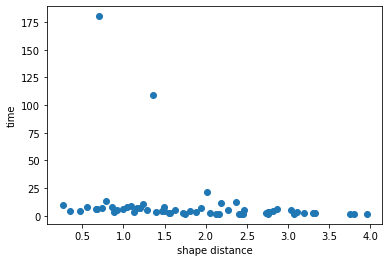

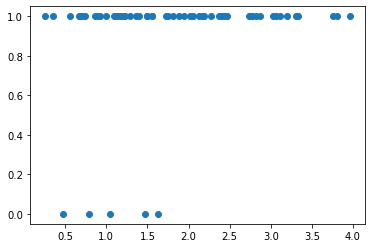

Juaquin


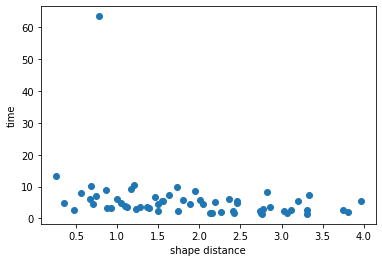

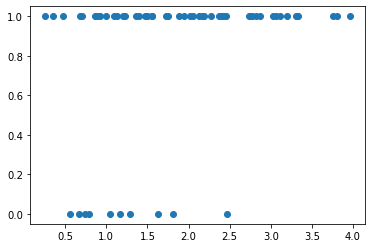

nechama frenkel


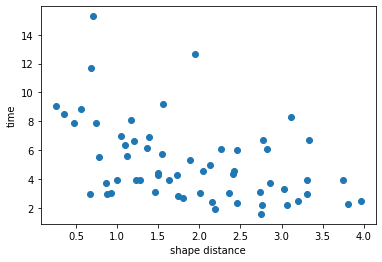

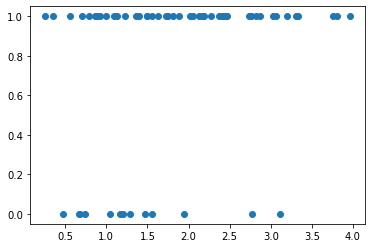

anu


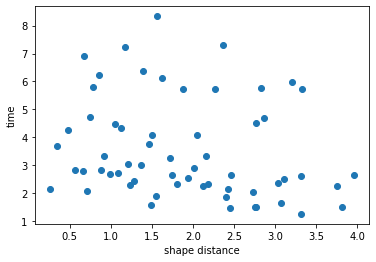

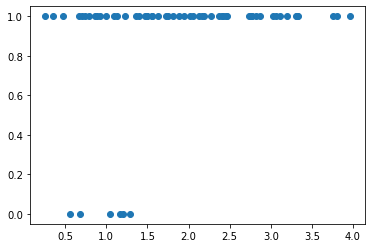

Muhammad Arif


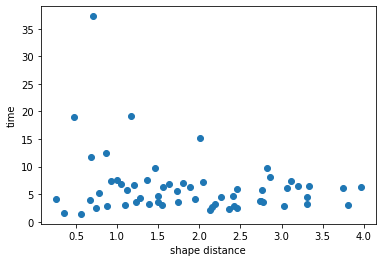

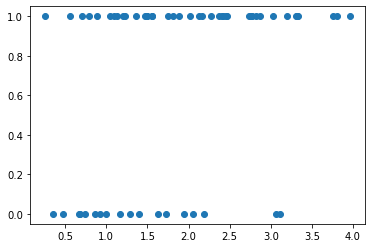

In [6]:
rts = []
corrects = []
phases = []
difficulties = []

for user in data:
    print(user[1]['response']['user_id'])
    rt, correct, difficulty, phase = get_stats(user)
    phases.append(phase)
    rts.append(rt)
    corrects.append(correct)
    difficulties.append(difficulty)
    
    plt.scatter(difficulty, [x/1000 for x in rt])
    plt.xlabel('shape distance')
    plt.ylabel('time')
    plt.show()
    
    plt.scatter(difficulty, correct)
    plt.show()

In [7]:
all_rts = np.concatenate([rts], axis=0).flatten() / 1000
all_corrects = np.concatenate([corrects], axis=0).flatten()
difficulties = np.array(difficulties).flatten()
all_phases = np.array(phases).flatten()

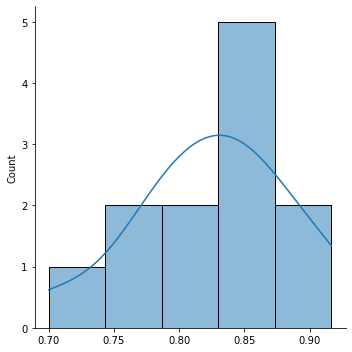

In [8]:
sns.displot(np.array(corrects).mean(axis=1), kde=True)

In [9]:
import scipy.stats as sps

In [10]:
np.sum(all_corrects) / (60 * 12)

0.825

In [11]:
np.mean(all_rts), np.std(all_rts)

(5.539307687499719, 8.845305159255853)

Text(0, 0.5, 'Response Time (s)')

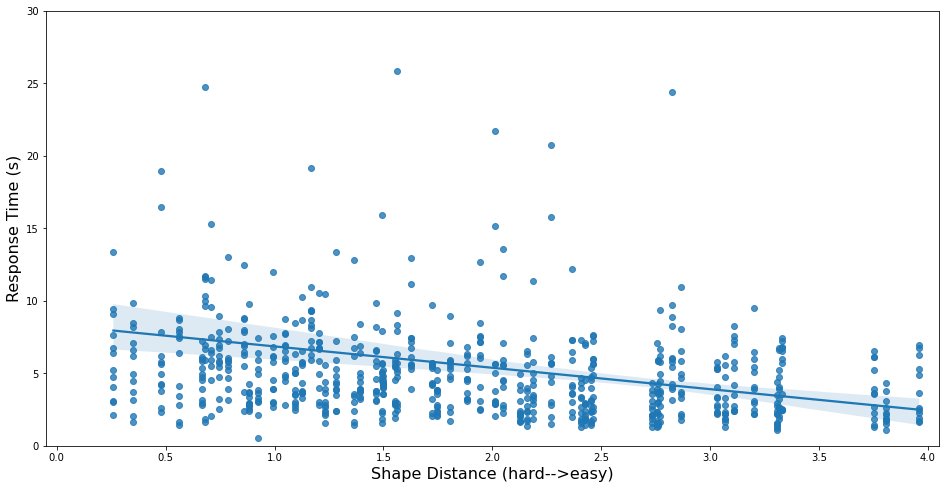

In [12]:
fig = plt.figure(figsize=(16,8))
sns.regplot(x=difficulties, y=all_rts, order=1)
plt.ylim(0, 30)
plt.xlim(-0.05, 4.05)
plt.xlabel('Shape Distance (hard-->easy)', fontsize=16)
plt.ylabel('Response Time (s)', fontsize=16)


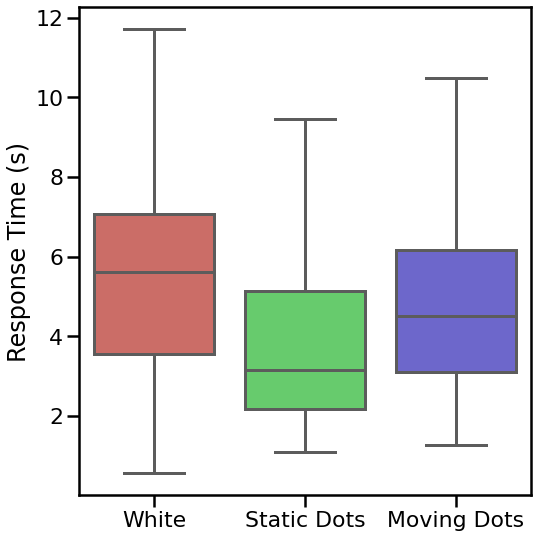

In [30]:
fig, ax3 = plt.subplots(figsize=(8,8))
sns.boxplot(x=all_phases, y=all_rts, ax=ax3, palette='hls', showfliers=False)
ax3.set_ylabel('Response Time (s)', fontsize=24)
plt.legend()
plt.tight_layout()
#ax3.set_xlabel('Background Type')
plt.savefig('background_v_resptime.pdf', format='pdf')

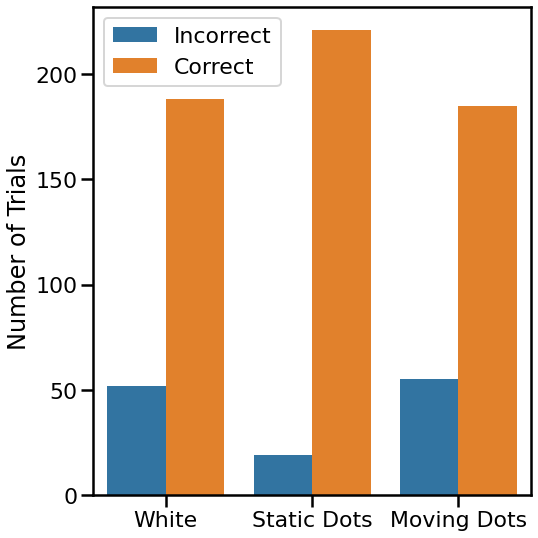

In [33]:
fig, ax4 = plt.subplots(figsize=(8,8))
sns.countplot(x=all_phases, hue=all_corrects, ax=ax4)
ax4.set_ylabel('Number of Trials')
plt.legend(labels=['Incorrect', 'Correct'])
plt.tight_layout()
#ax3.set_xlabel('Background Type')
plt.savefig('correct_by_background.pdf', format='pdf')

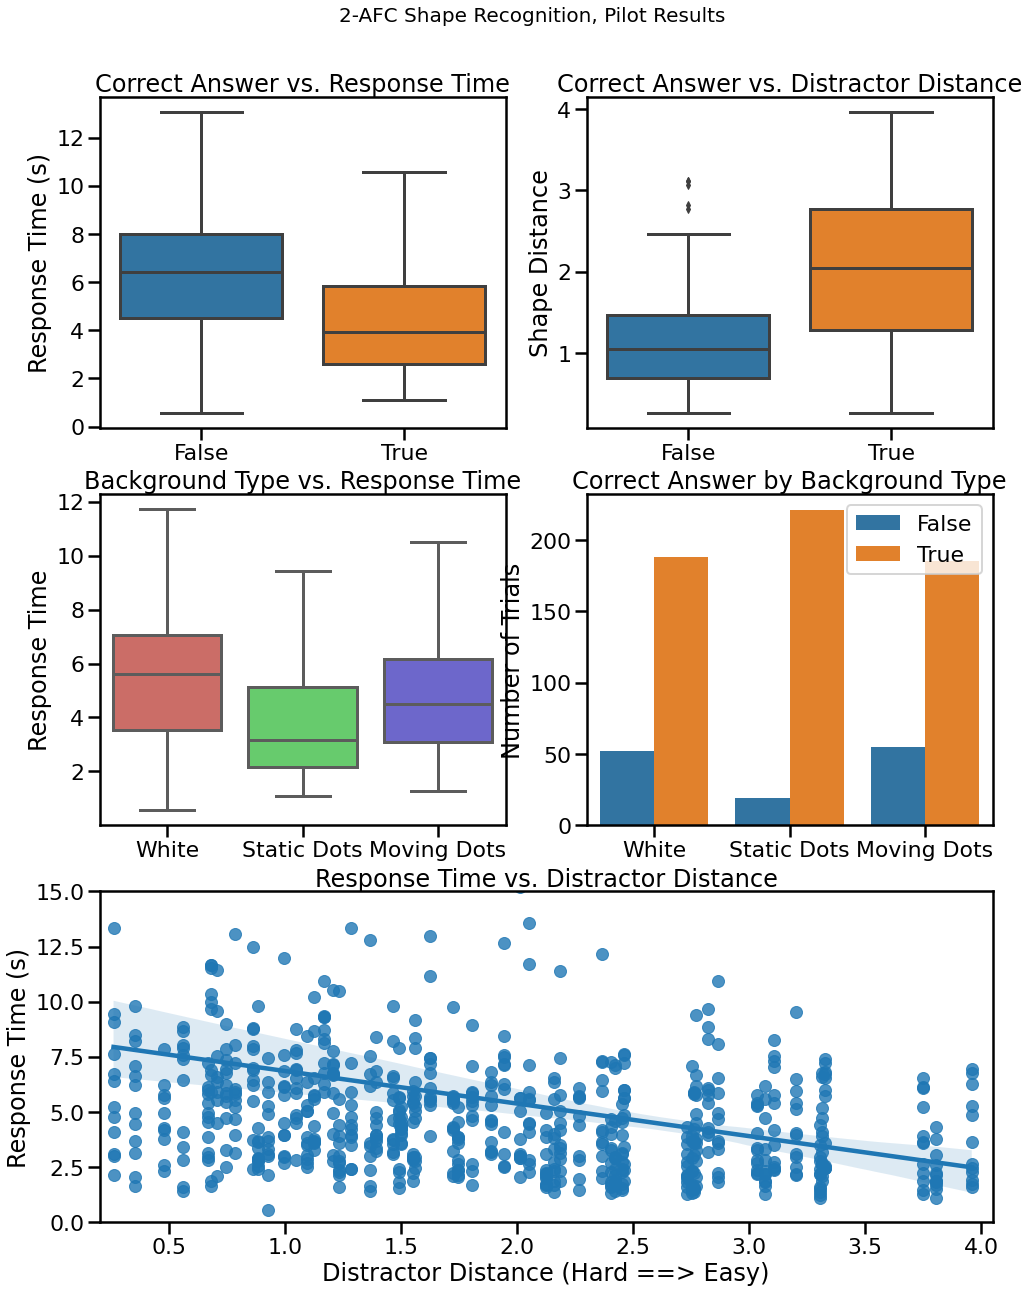

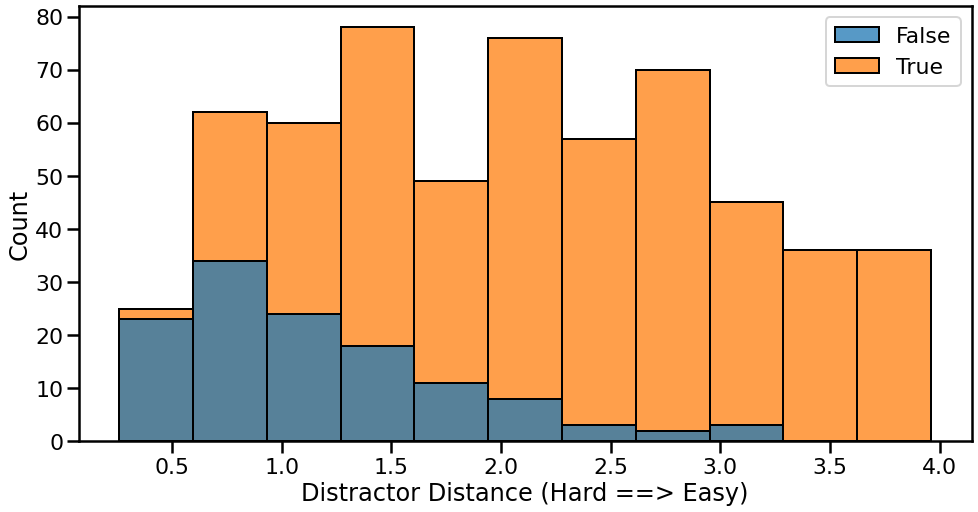

In [17]:
fig, axs = plt.subplots(1,4, figsize=(16,28), sharey=False, sharex=False)

ax1 = plt.subplot(421)
sns.boxplot(x=all_corrects, y=all_rts, ax=ax1, showfliers=False)
ax1.set_ylabel('Response Time (s)')
#ax1.set_xlabel('Correct Answer')
ax1.set_title('Correct Answer vs. Response Time')

ax2 = plt.subplot(422)
sns.boxplot(x=all_corrects, y=difficulties, ax=ax2)
ax2.set_ylabel('Shape Distance')
#ax2.set_xlabel('Correct Answer')
ax2.set_title('Correct Answer vs. Distractor Distance')

ax3 = plt.subplot(423)
sns.boxplot(x=all_phases, y=all_rts, ax=ax3, palette='hls', showfliers=False)
ax3.set_ylabel('Response Time')
#ax3.set_xlabel('Background Type')
ax3.set_title('Background Type vs. Response Time')

ax4 = plt.subplot(424)
sns.countplot(x=all_phases, hue=all_corrects, ax=ax4)
ax4.set_ylabel('Number of Trials')
#ax4.set_xlabel('Background Type')
ax4.set_title('Correct Answer by Background Type')

ax5 = plt.subplot(4, 2, (5,6))
sns.regplot(x=difficulties, y=all_rts, ax=ax5)
ax5.set_ylim(0, 15)
ax5.set_xlim(0.2, 4.05)
ax5.set_xlabel('Distractor Distance (Hard ==> Easy)')
ax5.set_ylabel('Response Time (s)')
ax5.set_title('Response Time vs. Distractor Distance', pad=-5)
plt.suptitle('2-AFC Shape Recognition, Pilot Results', y=0.925, fontsize=20)

plt.show()


fig = plt.figure(figsize=(16,8))
sns.histplot(x=difficulties, hue=all_corrects)
plt.xlabel('Distractor Distance (Hard ==> Easy)')
plt.show()
# #ax4 = plt.subplot(113)
# ax4.boxplot(phases, corrects)

# plt.show()